In [1]:
#!pip3 install twint

# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import nest_asyncio # Patch asyncio to allow nested event loops
nest_asyncio.apply()

In [2]:
#!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [3]:
#!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

In [4]:
import snscrape.modules.twitter as sntwitter
import snscrape.modules.twitter

# Scraping data
TWINT:    
1. https://analyticsindiamag.com/complete-tutorial-on-twint-twitter-scraping-without-twitters-api/


Snsscrape:    
1. https://github.com/MartinBeckUT/TwitterScraper/blob/master/snscrape/python-wrapper/snscrape-python-wrapper.ipynb
2. https://medium.com/swlh/how-to-scrape-tweets-by-location-in-python-using-snscrape-8c870fa6ec25
3. https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af

Collect NFT ethical-related discussion from twitter KOL 'NFTethics'  

We want to analyze not only the tweets from 'NFTethics' which has 85.5k followers but also the whole internet opinions. So we also need to scrape corresponding replies at each tweet collected. Thus we broke down the goal into tasks below:
1. collect tweets from twitter user 'NFTethics'
2. find corresponding replies of each collected tweet
3. store both tweets and replies into one text file
4. preprocess the text file
5. analysis by different methods

## T1: collect tweets from twitter 
重要信息：数据采集时间段，总计多少条

### Collect by snscrape 

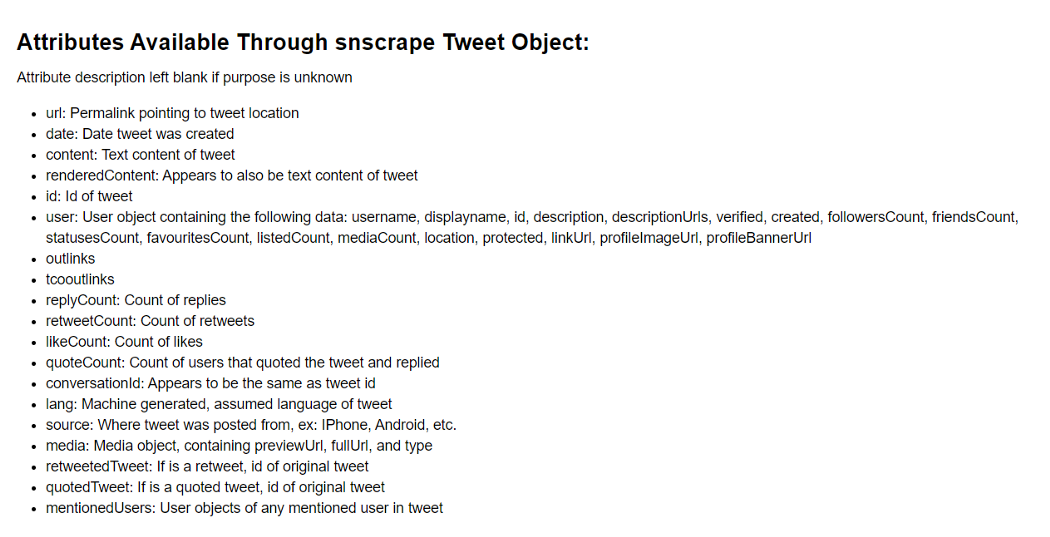

In [8]:
def sns_query(keyword,since,end):
    # Creating list to append tweet data to
    tweets_list = []

    # Using TwitterSearchScraper to scrape data and append tweets to list
    try:
        # only scrape English tweets which has at least 5 likes
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'NFT {keyword} since:{since} until:{end} min_faves:5 exclude:retweets lang:en').get_items()):
            tweets_list.append([tweet.date, tweet.user, tweet.content, tweet.url]) #tweet.id
    except Exception as e:
        print(e)
    
    result=pd.DataFrame(tweets_list, columns=['Date', 'User','Tweets','Url'])
    result.to_csv(f"./data/NFT {keyword}.csv")
    
    print(f"Task:query {keyword} since {since} to {end} finished!")
    
    return result

### Query by group

1. ethics, ethical, morality, moral   
2. fairness, equity, equality  
3. trust, transparency, transparent   
4. bias, discrimination, racism  
5. diversity, diverse  

In [2]:
ethic_group = ['ethics','ethical', 'morality', 'moral']
fairness_group = ['fairness', 'equity', 'equality']
trust_group = ['trust', 'transparency', 'transparent']
bias_group = ['bias', 'discrimination', 'racism']
diversity_group = ['diversity','diverse']

In [9]:
for i in ethic_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query ethics since 2021-06-01 to 2022-06-01 finished!
Task:query ethical since 2021-06-01 to 2022-06-01 finished!
Task:query morality since 2021-06-01 to 2022-06-01 finished!
Task:query moral since 2021-06-01 to 2022-06-01 finished!


In [10]:
for i in fairness_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query fairness since 2021-06-01 to 2022-06-01 finished!
Task:query equity since 2021-06-01 to 2022-06-01 finished!
Task:query equality since 2021-06-01 to 2022-06-01 finished!


In [11]:
for i in trust_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query trust since 2021-06-01 to 2022-06-01 finished!
Task:query transparency since 2021-06-01 to 2022-06-01 finished!
Task:query transparent since 2021-06-01 to 2022-06-01 finished!


In [12]:
for i in bias_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query bias since 2021-06-01 to 2022-06-01 finished!
Task:query discrimination since 2021-06-01 to 2022-06-01 finished!
Task:query racism since 2021-06-01 to 2022-06-01 finished!


In [13]:
for i in diversity_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query diversity since 2021-06-01 to 2022-06-01 finished!
Task:query diverse since 2021-06-01 to 2022-06-01 finished!


In [14]:
# store tweets of different keywords in respective dataframes
for i in ethic_group+fairness_group+trust_group+bias_group+diversity_group:
    if ' ' in i:
        name = i.replace(' ','_')
        exec('df_{} = pd.read_csv(\'./data/{}.csv\')'.format(name,'NFT '+i))
    else:
        exec('df_{} = pd.read_csv(\'./data/{}.csv\')'.format(i,'NFT '+i))

### Combining all tweets

In [2]:
import os, glob

path = "./data/"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, index_col=[0])
    df['file'] = f.split('/')[-1]
    all_df.append(df)
    
df_merged = pd.concat(all_df, ignore_index=True, sort=True)
# find the account name
df_merged['User'] = df_merged['User'].apply(lambda x: x.split('/')[-1])

In [3]:
# df_merged.to_csv('df_all_tweets.csv')

In [2]:
df_merged = pd.read_csv('df_all_tweets.csv',index_col=[0])

In [6]:
print('There are',len(df_merged),'tweets collected in total')

There are 33535 tweets collected in total


In [104]:
df_merged.head()

Date  \
0  2022-05-31 20:49:25+00:00   
1  2022-05-31 16:46:28+00:00   
2  2022-05-31 12:19:47+00:00   
3  2022-05-31 08:33:42+00:00   
4  2022-05-30 09:27:58+00:00   

                                              Tweets  \
0  Zero-sum thinking, bag bias, elitism, and maxi...   
1  Looking at NFT projects these days has become ...   
2  @freak__nft IMO @officialmocossi are super und...   
3  @TrizyTradez This is called Dunning-Kruger Eff...   
4  you might think I'm bias but...\n\n@DeGodsNFT ...   

                                                 Url          User  \
0  https://twitter.com/LeonidasNFT/status/1531739...   LeonidasNFT   
1  https://twitter.com/eddyiskongz/status/1531678...   eddyiskongz   
2  https://twitter.com/mnddigexplr/status/1531611...   mnddigexplr   
3  https://twitter.com/NFT_Doctor33/status/153155...  NFT_Doctor33   
4  https://twitter.com/AussieNftGuy/status/153120...  AussieNftGuy   

                file  
0  data\NFT bias.csv  
1  data\NFT bias.csv  
2  data\NFT bias.csv  
3  data\NFT bias.csv  
4  data\NFT bias.csv

In [7]:
print('There are',len(df_merged['User'].unique()),'unique users posted tweets according to our dataset')

There are 21573 unique users posted tweets according to our dataset


In [35]:
df_merged.file.value_counts() # tweets category ranking

data\NFT trust.csv             12839
data\NFT ethics.csv             4335
data\NFT transparent.csv        3050
data\NFT diverse.csv            3019
data\NFT transparency.csv       2774
data\NFT diversity.csv          2612
data\NFT equity.csv             1099
data\NFT equality.csv            941
data\NFT bias.csv                625
data\NFT moral.csv               624
data\NFT ethical.csv             496
data\NFT racism.csv              469
data\NFT fairness.csv            354
data\NFT discrimination.csv      204
data\NFT morality.csv             94
Name: file, dtype: int64

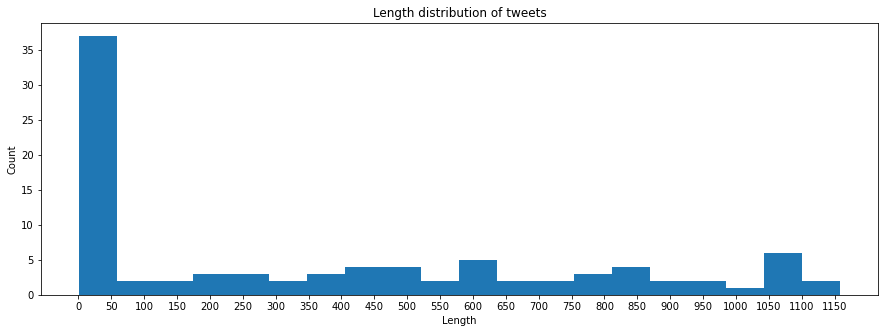

In [64]:
plt.figure(figsize=(15,5))
df_merged.Tweets.map(lambda x: len(x.split(' '))).sort_values(ascending=False).reset_index(drop = True).value_counts().plot(kind='hist',bins=20)
plt.title('Length distribution of tweets')
plt.ylabel('Count')
plt.xlabel('Length')
plt.xticks(range(0,1200,50))
plt.show()

Most of length of tweets do not exceed 50 words.

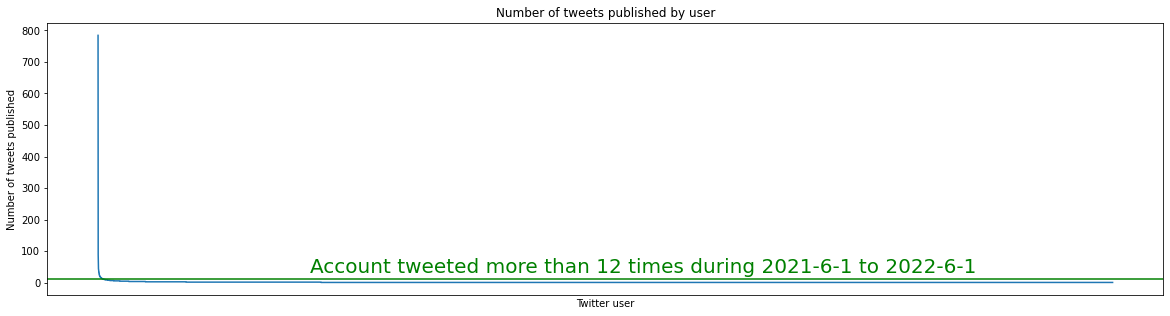

In [137]:
plt.figure(figsize=(20,5))
plt.plot(df_merged['User'].value_counts().values)
plt.title('Number of tweets published by user')
plt.ylabel('Number of tweets published')
plt.xlabel('Twitter user')
plt.axhline(y=12,color='green')
plt.text(4500,30,'Account tweeted more than 12 times during 2021-6-1 to 2022-6-1', fontsize=20, color='green')
plt.xticks([], [])
plt.show()

In [33]:
# 2021/6/1 - 2022/6/1 unique user posting more than once
df_merged['User'].value_counts()[df_merged['User'].value_counts(ascending=False)>1]

NFTethics          784
wearelivingNFT     146
PixelSaurusNFT      92
shreyamishra92      89
takeupspace_nft     77
                  ... 
thefaithong          2
CARDELUCCI           2
WillisP90            2
0xGokce              2
Bwolf_NFT            2
Name: User, Length: 4740, dtype: int64

In [35]:
4740/21573

0.2197190933110833

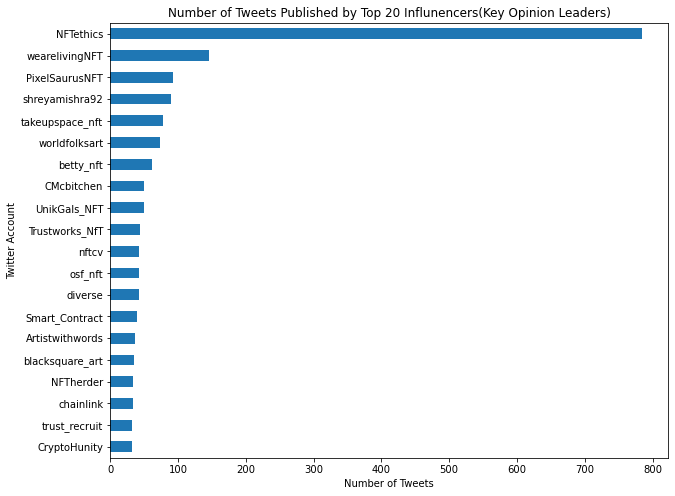

In [3]:
#top_tweets_account = list(df_merged['User'].value_counts(ascending=True)[-10:].index)
plt.figure(figsize=(10,8))
df_merged['User'].value_counts(ascending=True)[-20:].plot(kind='barh')
plt.title('Number of Tweets Published by Top 20 Influnencers(Key Opinion Leaders)')
plt.ylabel('Twitter Account')
plt.xlabel('Number of Tweets')
plt.show()

In [87]:
# 2021/6/1 - 2022/6/1 unique user posting more than once
df_merged['User'].value_counts()[df_merged['User'].value_counts(ascending=False)>12]

NFTethics          784
wearelivingNFT     146
PixelSaurusNFT      92
shreyamishra92      89
takeupspace_nft     77
                  ... 
swombat             13
EricSpivak          13
donbobito           13
CryptoKing_NFT      13
EkoalatyProject     13
Name: User, Length: 96, dtype: int64

In [4]:
# 取一年内推文发布数量大于11的推特用户作为Key opinion leader
KOL = df_merged['User'].value_counts(ascending=True)[-12:].index

# Data cleaning
references:
1. https://stackoverflow.com/questions/64719706/cleaning-twitter-data-pandas-python
2. https://catriscode.com/2021/05/01/tweets-cleaning-with-python/
3. https://towardsdatascience.com/twitter-sentiment-analysis-using-fasttext-9ccd04465597

We’ll clean tweets based on these rules:
1. Remove all the hashtags as hashtags do not affect sentiments.
2. Remove mentions as they also do not weigh in sentiment analyzing.
3. Replace any emojis with the text they represent as emojis or emoticons plays an important role in representing a sentiment.
4. Replace contractions with their full forms.
5. Remove any URLs present in tweets as they are not significant in sentiment analysis.
6. Remove punctuations.
7. Fix misspelled words (very basic as this is a very time-consuming step).
8. Convert everything to lowercase.

In [5]:
import json
import re
import emoji
import datetime
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer # Wordnet is used for lemmatization (aka stemming), which is the process of bringing words down to their 'root' word. 
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import brown
from nltk.corpus import stopwords

In [6]:
# emoticons 表情符号
def load_dict_smileys():
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

# self defined contractions 缩写
def load_dict_contractions():
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "dont":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "isnt":"is not",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "youre":"you are",
        'yall':"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "irl":"in real life"
        }

In [7]:
def cleaner(tweet):
    '''
    Define a function to clean twitter text for sentiment analysis.
    Input: text string
    Output: filter and delete html labels, unnecessary links, hashtags, username, punctuations; deal with emojis
    '''
    #Escaping HTML characters
    tweet = BeautifulSoup(tweet).get_text()
    #Remove @ mentions
    tweet = re.sub(r"@[A-Za-z0-9]+","",tweet)
    #Remove # hashtags
    tweet = re.sub(r"#[A-Za-z0-9_]+","", tweet)
    #Remove http links
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    #Remove punctuation
    tweet = re.sub(r"[^\w\s]","",tweet)
    #Deal with emojis
    tweet = emoji.demojize(tweet)
    tweet = tweet.replace(":"," ")
    tweet = ' '.join(tweet.split())
    #Remove numbers
    tweet = re.sub(r"\d","",tweet)
    
    #Lower case
    #tweet = tweet.lower() #不小写是因为社交媒体中大小写变化常常反映情绪的变化
    
    #Normalize CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’","'")
    words = tweet.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(reformed)
    
    #Deal with emoticons source: https://en.wikipedia.org/wiki/List_of_emoticons
    SMILEY = load_dict_smileys()  
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    
    #Clean stopwords
    manual_screen = ['also','nfts','going'] 
    stop_words = stopwords.words('english')+manual_screen
    words = tweet.split()
    reformed = [w for w in words if w.lower() not in stop_words]
    tweet = " ".join(reformed)
    
    #Lemmatize 词形还原 且仅保留英文
    lemmatizer = WordNetLemmatizer()
    words = tweet.split()
    reformed = [lemmatizer.lemmatize(w) for w in words if w.encode().isalpha()] #必须加个encode，否则中文也会被当成英文
    tweet = " ".join(reformed)
    
    return tweet

# store all tweets and replies to a txt file
import csv
def list_to_string(lst):
    return " ".join(lst)

新建一个df变量，值为预处理过的推特文本内容

In [6]:
df_merged_clean = df_merged.copy()
tweet_clean = df_merged['Tweets'].apply(lambda x:cleaner(x))
df_merged_clean['Tweets']= tweet_clean

In [7]:
'''
输入：dataframe，存储着按某个关键词爬虫到的推特
输出：执行完文本清理后的txt推特文档
'''
def save_tweets_to_txt(df,filename):
    # clean collected tweet
    df['Tweets'] = df['Tweets'].map(lambda x: cleaner(x))
    
    # export tweets to a txt file
    df['Tweets'].map(lambda x: cleaner(x))[df['Tweets'] != ''].to_csv('./tweets/'+filename, sep=' ', 
                      index=False,header=False,
                      quoting=csv.QUOTE_NONE,escapechar=' ')

'''
输入：推特txt文档
输出：输出tokenize过后的word list
'''
def read_txt_by_word(filename):
    with open('./tweets/'+filename,mode='r',encoding='utf-8') as f:
        text.append(f.read())
        
    # seperate by space
    words = ' '.join(text).replace('\n',' ').split()

    # remove short meaningless characters
    for word in words:
        if word!=' ' and len(word)<3:
            words.remove(word)

    return words

## preprocessed data

将每个【关键词】爬虫到的推文进行【预处理】并存储到txt文本中

In [19]:
# store tweets from each keyword to according txt file
for i in ethic_group+fairness_group+trust_group+bias_group+diversity_group:
    if ' ' in i:
        i = i.replace(" ","_")
    name = f'df_{i}'
    save_tweets_to_txt(eval(name),f'tweets_{i}.txt')

随机从每个【关键词】中抽50个推特原文，创建5个dataframe变量存储对应【关键词组】下抽取到的推特原文

In [61]:
# randomly select specific number of tweets from each twwets file
def random_select_tweees(groupname,number):
    all_sampled_df = [] 
    for i in eval(groupname):
        df = pd.read_csv('./data/NFT '+i+'.csv', index_col=[0])
        df = df.sample(number)
        all_sampled_df.append(df)
        df.to_csv(f'./data/df_{i}_sampled.csv')
    return pd.concat(all_sampled_df, ignore_index=True)

In [62]:
for i in ['ethic_group','fairness_group','trust_group','bias_group','diversity_group']:
    #创建变量存储抽取到的推特原文
    exec(f'df_{i}_sampled = random_select_tweees(i,50)')
    print(i)
    print('========================================')
    print(eval(f"df_{i}_sampled.Tweets.values"))
    print('========================================')

ethic_group
["@NFTethics I'm willing to bet that center wallet is a coinbase common. SMH weak analysis"
 '3/ We can understand the logic behind it, and also we are fallible to the same “flaw”. When we report something, we might be 95% “right” but there could be collateral damage. You can’t check each &amp; every detail (certainly not with NFTs) and these details can also change over time'
 '@ninaadkothawade @NFTethics LMAOOOOOOO'
 '@SPACEracerX @NFT_L30 @SolarEtherPunk @NFTethics If cooltopia turns in to a metaverse mmorpg I’m dumping immediately. I thought I was buying a simple clicker ponzi game.'
 '@osf_nft @NFTethics Sacred Devils took them down https://t.co/8QMe773lMU'
 '@apesnotleaving1 @amal_h0pe @bapesclan @bapesraiders @NFTethics 250 wallets but 1 of them is a life pod that will be taking off to bapes world! Staking mechanism the best is yet to come'
 '@NFTethics @yugalabs Welcome to Web3, where Web2 giants become even more enormous.\nThe same VCs making headlines everywhere.\

["@TheGlitches_ diversity. the more NFT's grow, the more diverse group of collectors there are. glitches are the ppl"
 'Notice when everyone around your table looks and thinks like you.  Proud of the leaders that are intentional about diversity and believe that web3 is for everyone!  @ryancarson and @betty_nft are great examples of leaders that are putting their money where their mouth is.'
 '@NFT_NYC @meta_angels @aslanruby @HoneyBadgesNFT ✨The Diversity Award: @thehugxyz\nOK, I work for HUG, &amp;... I have honestly never been part of a more intentional community, not just saying the word diversity, but living it. HUG is leading by example, having difficult conversations + learning + growing together as a community.'
 'Diversity is inherent in humanity. I would like to express this more with my Nft collection.Follow here and check out the opensea solution to see if you find anything interesting.😉\n#NFT #nftart #nfts #NFTCommunity #NFTartists \n\nBy: https://t.co/TAHl45sTGh https://t.

### Tokenize by group

In [9]:
# 定义一个功能，输入（自定义的字典名称，关键词组名），用于将给定关键词组下所有关键词的推特文本合并后返回tokenize的word list
# 返回结果为一个key为自定义名称，value为tokenized word list的字典
def organize_by_group(name,group):
    # emerge all tweets from each keyword and tokenize to a word list
    text = []
    for i in group:
        if ' ' in i:
            i = i.replace(" ","_")
        with open(f'./tweets/tweets_{i}.txt',mode='r',encoding='utf-8') as f:
            text.append(f.read())
 
    words = ' '.join(text).replace('\n',' ').split()

    # remove short（length<3） meaningless characters
    for word in words:
        if word!=' ' and len(word)<=3:
            while word in words:
                words.remove(word)
        else:
            continue
            
    return {name:words}

In [12]:
words_group = {}
# update字典合并
words_group.update(organize_by_group('ethic_group',ethic_group))
words_group.update(organize_by_group('fairness_group',fairness_group))
words_group.update(organize_by_group('trust_group',trust_group))
words_group.update(organize_by_group('bias_group',bias_group))
words_group.update(organize_by_group('diversity_group',diversity_group))

将【预处理后】的推特文本全部集合到列表中

In [76]:
# all tweets collected and preprocessed
tweets = []
for i in ethic_group+fairness_group+trust_group+bias_group+diversity_group:
    if ' ' in i:
        i = i.replace(" ","_")
    with open(f'./tweets/tweets_{i}.txt',mode='r',encoding='utf-8') as f:
        tweets.extend(f.read().lower().split('\n'))

In [7]:
# 返回某个关键词组下的推特列表
def collect_tweets_by_group(groupname):
    tweets = []
    for i in groupname:
        if ' ' in i:
            i = i.replace(" ","_")
        with open(f'./tweets/tweets_{i}.txt',mode='r',encoding='utf-8') as f:
            tweets.extend(f.read().lower().split('\n'))
    
    return tweets

In [72]:
# 动态命名：各关键词组所爬的推特
for i in ['ethic_group','fairness_group','trust_group','bias_group','diversity_group']:
    exec(f'tweets_{i} = collect_tweets_by_group({eval(i)})')

Sampled tweets

In [4]:
def tweets_txt_to_words(groupname):
    # tokenize tweets txt to a word list
    text = []
    with open(f'./tweets/tweets_{groupname}.txt',mode='r',encoding='utf-8') as f:
        text.append(f.read())

    words = ' '.join(text).replace('\n',' ').split()

    # remove short meaningless characters
    for word in words:
        if word!=' ' and len(word)<=3:
            while word in words:
                words.remove(word)
        else:
            continue
            
    return {groupname:words}

In [5]:
sampled_words_group = {}
# 字典合并
sampled_words_group.update(tweets_txt_to_words('ethic_group'))
sampled_words_group.update(tweets_txt_to_words('fairness_group'))
sampled_words_group.update(tweets_txt_to_words('trust_group'))
sampled_words_group.update(tweets_txt_to_words('bias_group'))
sampled_words_group.update(tweets_txt_to_words('diversity_group'))

### Combine all

Combine all

In [19]:
# emerge all tweets from each keyword and tokenize to a word list
text = []
for i in ethic_group+fairness_group+trust_group+bias_group+diversity_group:
    if ' ' in i:
        i = i.replace(" ","_")
    with open(f'./tweets/tweets_{i}.txt',mode='r',encoding='utf-8') as f:
        text.append(f.read())

# seperate by space
words = ' '.join(text).replace('\n',' ').split()

# remove short meaningless characters
for word in words:
    if word!=' ' and len(word)<=3:
        while word in words:
            words.remove(word)
    else:
        continue

Combine all sampled

In [6]:
# emerge all tweets from each keyword and tokenize to a word list
text = []
for i in ['ethic_group','fairness_group','trust_group','bias_group','diversity_group']:
    with open(f'./tweets/tweets_{i}.txt',mode='r',encoding='utf-8') as f:
        text.append(f.read())

# seperate by space
words_sampled = ' '.join(text).replace('\n',' ').split()

# remove short meaningless characters
for word in words_sampled:
    if word!=' ' and len(word)<=3:
        while word in words_sampled:
            words_sampled.remove(word)
    else:
        continue

# Word frequncy

## All

In [34]:
lowered_words = [word.lower() for word in words] 
fdist = nltk.FreqDist(lowered_words) # create a frequency distribution containing the given samples
print(fdist)

<FreqDist with 28546 samples and 463508 outcomes>


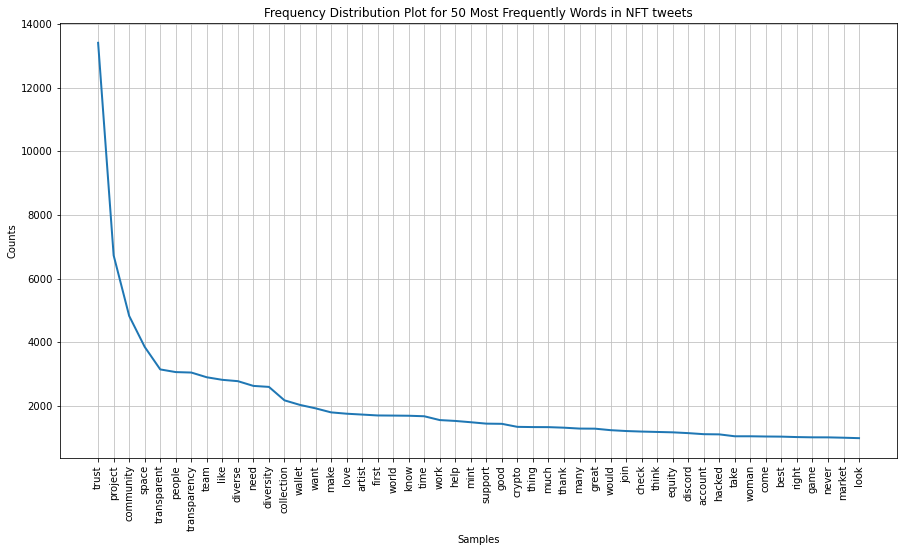

In [35]:
plt.figure(figsize=(15,8))
plt.title('Frequency Distribution Plot for 50 Most Frequently Words in NFT tweets')
fdist.plot(50)
plt.show()

## By Keyword Group

In [194]:
lowered_words_by_group = {}
for i in ['ethic_group','fairness_group','trust_group','bias_group','diversity_group']:
    lowered_words_by_group[i] = [word.lower() for word in words_group[i]]
    exec(f'{i}_fdist = nltk.FreqDist(lowered_words_by_group[i])') # create a frequency distribution containing the given samples
    print(eval(i+'_fdist'))

<FreqDist with 9818 samples and 68597 outcomes>
<FreqDist with 6798 samples and 35613 outcomes>
<FreqDist with 19684 samples and 264356 outcomes>
<FreqDist with 4721 samples and 18364 outcomes>
<FreqDist with 9711 samples and 76962 outcomes>


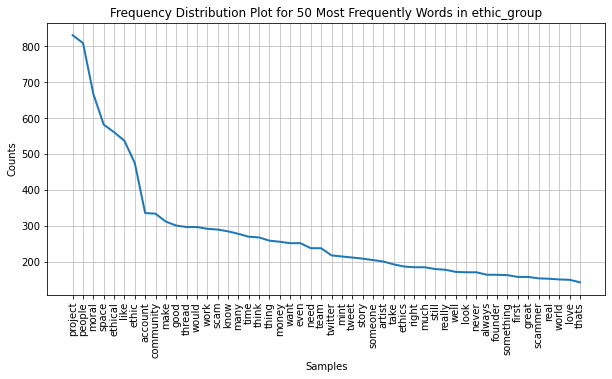

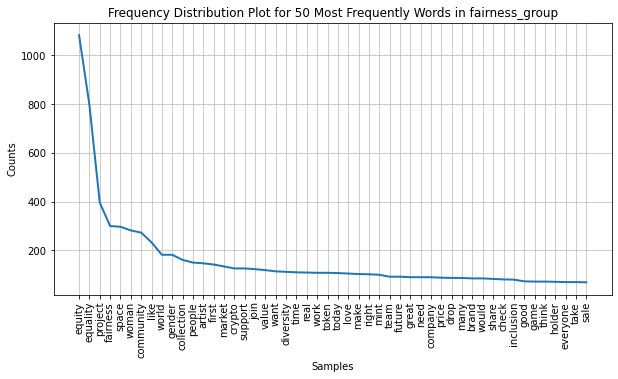

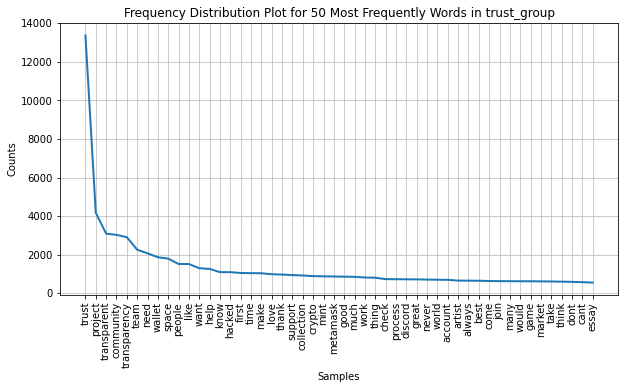

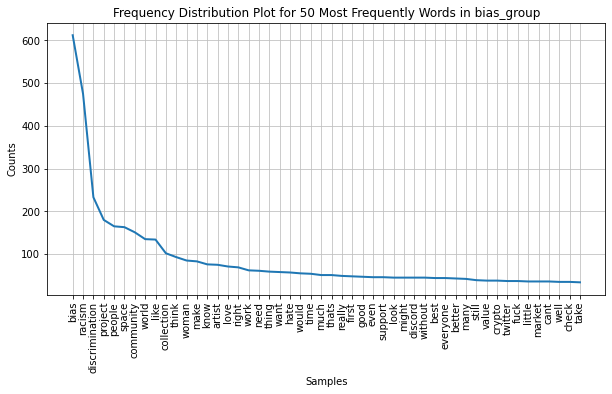

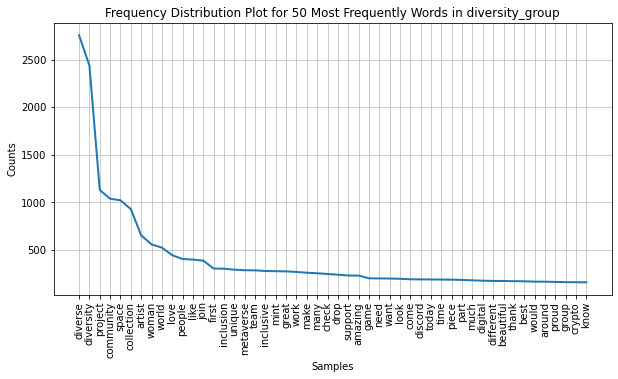

In [196]:
for i in ['ethic_group','fairness_group','trust_group','bias_group','diversity_group']:
    plt.figure(figsize=(10,5))
    plt.title(f'Frequency Distribution Plot for 50 Most Frequently Words in {i}')
    eval(i+'_fdist').plot(50)
    plt.show()

# Wordcloud

In [167]:
stop_words = stopwords.words('english')

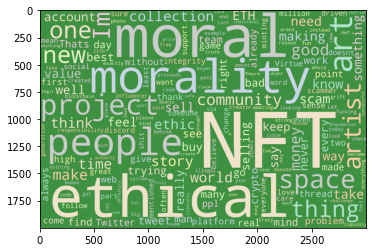

In [168]:
with open(f'tweets_ethic_group.txt',mode='r',encoding='utf-8') as f:
        wordcloud = WordCloud(random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).\
                generate(f.read())
        # Visualize the word cloud
        plt.imshow(wordcloud)

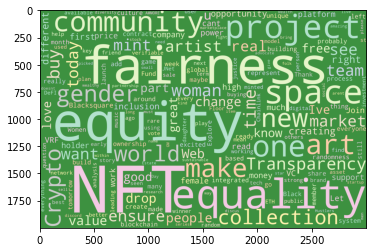

In [169]:
with open(f'tweets_fairness_group.txt',mode='r',encoding='utf-8') as f:
        wordcloud = WordCloud(random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).\
                generate(f.read())
        # Visualize the word cloud
        plt.imshow(wordcloud)

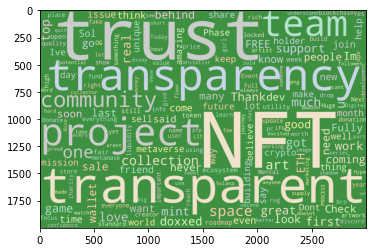

In [170]:
with open(f'tweets_trust_group.txt',mode='r',encoding='utf-8') as f:
        wordcloud = WordCloud(random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).\
                generate(f.read())
        # Visualize the word cloud
        plt.imshow(wordcloud)

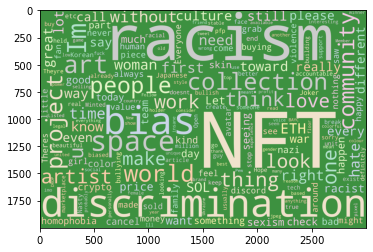

In [171]:
with open(f'tweets_bias_group.txt',mode='r',encoding='utf-8') as f:
        wordcloud = WordCloud(random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).\
                generate(f.read())
        # Visualize the word cloud
        plt.imshow(wordcloud)

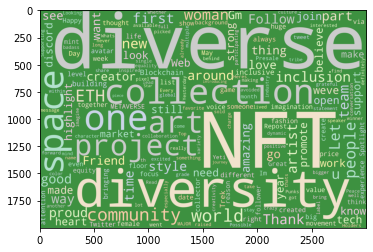

In [172]:
with open(f'tweets_diversity_group.txt',mode='r',encoding='utf-8') as f:
        wordcloud = WordCloud(random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).\
                generate(f.read())
        # Visualize the word cloud
        plt.imshow(wordcloud)

# Word Co-ocurrence and Network Analysis

## Analyze in total

In [64]:
from nltk import word_tokenize
from nltk.util import ngrams

# Define a function to calculate the bigram frequency of tweets by keyword group
def calculate_bigram(tweets):
    # 发现收集的每条推特的co-occurence words（即bigram 字母组）
    bigrams = []
    for tweet in tweets:
        token = word_tokenize(tweet)
        token = [i for i in token if len(i)>2]
        bigram = list(ngrams(token, 2)) 
        bigrams.extend(bigram)

    # 按照出现频率对bigram排序
    def sort_by_value(d):
        '''function used to sort dictionary by value'''
        return sorted(d.items(), key=lambda k: k[1],reverse=True)  # k[1] get the dict value

    # 计算bigram出现的频率        
    from collections import Counter
    bi_count = dict(Counter(bigrams))
    
    bi_freq = sort_by_value(bi_count)
    
    # transform dict to dataframe
    df = pd.DataFrame.from_dict(bi_count, orient='index')
    df = df.reset_index().rename(columns={'index': 'bigram'})
    # rename columns
    df.columns = ['bigram', 'count']
    
    return df

In [77]:
keywords = ethic_group+fairness_group+trust_group+bias_group+diversity_group

from nltk import word_tokenize
from nltk.util import ngrams

# 发现收集的每条推特的co-occurence words（即bigram 字母组）
bigrams = []
for tweet in tweets:
    token = word_tokenize(tweet)
    token = [i for i in token if len(i)>2]
    bigram = list(ngrams(token, 2)) 
    bigrams.extend(bigram)
    
# 按照出现频率对bigram排序
def sort_by_value(d):
    '''function used to sort dictionary by value'''
    return sorted(d.items(), key=lambda k: k[1],reverse=True)  # k[1] get the dict value

# 计算bigram出现的频率        
from collections import Counter
bi_count = dict(Counter(bigrams))

#bi_freq = sort_by_value(bi_count)

### bigrams

In [78]:
# transform dict to dataframe
df = pd.DataFrame.from_dict(bi_count, orient='index')
df = df.reset_index().rename(columns={'index': 'bigram'})
# rename columns
df.columns = ['bigram', 'count']
# Visualize top 30 bigrams
df.sort_values(by='count',ascending=False).iloc[:25]

bigram  count
237              (nft, space)   1652
298            (nft, project)   1430
38532         (trust, wallet)   1150
2711         (nft, community)    573
2430         (trust, process)    514
8816        (nft, collection)    455
13715           (got, hacked)    403
87268       (metamask, trust)    353
87130          (sugar, daddy)    315
25848            (need, help)    311
11784            (first, nft)    293
24621            (trust, nft)    269
87129           (need, sugar)    244
67545           (trust, team)    243
26578         (join, discord)    240
1991            (thank, much)    239
32947    (full, transparency)    234
83038        (trust, project)    232
87305          (write, essay)    229
11739            (nft, world)    225
246        (nft, marketplace)    224
61343  (diversity, inclusion)    214
11715              (new, nft)    213
375                (nft, art)    206
386             (nft, market)    204

### network

In [139]:
import networkx as nx
# Create network plot
G = nx.Graph()
# Create connections between nodes
for row in df.iterrows():
    bigm = row[1][0]
    count = row[1][1]
    G.add_edge(bigm[0], bigm[1], weight=(count /100))
#G.remove_nodes_from(["one", "know","see","make"])
print('Graph now has',len(G.nodes()),'nodes')

Graph now has 29959 nodes


In [140]:
# biagrams => Top 20 central words
sorted(G.degree, key=lambda x: x[1], reverse=True)[:20]

[('nft', 5222),
 ('trust', 4357),
 ('project', 2671),
 ('community', 1957),
 ('one', 1943),
 ('like', 1892),
 ('people', 1886),
 ('space', 1757),
 ('transparency', 1632),
 ('get', 1608),
 ('im', 1365),
 ('new', 1356),
 ('team', 1355),
 ('diversity', 1317),
 ('art', 1312),
 ('u', 1273),
 ('see', 1214),
 ('time', 1201),
 ('need', 1189),
 ('first', 1170)]

In [143]:
deg = G.degree()
to_keep = [item[0] for item in deg if item[1] >= 1000]
G_sub = G.subgraph(to_keep)
print('G_sub has',len(G_sub.nodes()),'nodes')

G_sub has 33 nodes


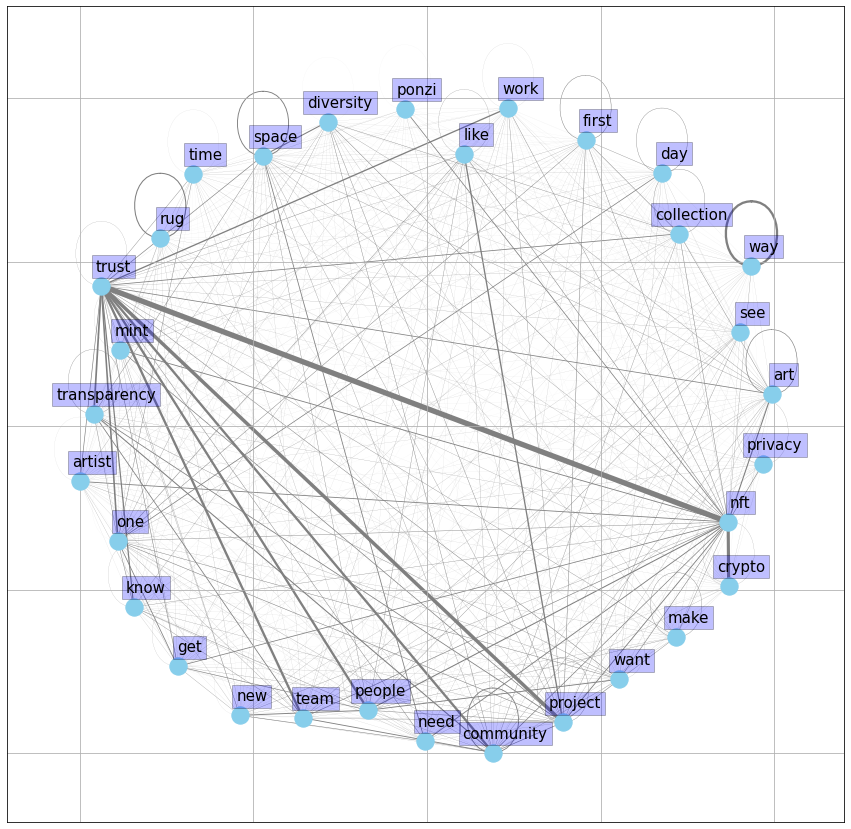

In [251]:
fig, ax = plt.subplots(figsize=(15, 15))

pos = nx.spring_layout(G_sub, k=10) # spring layout
edgewidth = [d['weight']*2 for (u,v,d) in G_sub.edges(data=True)]

# Plot networks
nx.draw_networkx(G_sub, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='grey',
                 node_color='skyblue',
                 with_labels = False,
                 ax=ax)

plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.25), #text box color
            horizontalalignment='center', fontsize=15)
    
plt.show()

## Analyze by group

### bigrams

In [293]:
from nltk import word_tokenize
from nltk.util import ngrams

# 按关键词组的tweets返回推特文本的前n个共词组
def count_bigram_by_group(tweets,n):
    # 发现收集的每条推特的co-occurence words（即bigram 字母组）
    bigrams = []
    for tweet in tweets:
        token = word_tokenize(tweet)
        token = [i for i in token if len(i)>2]
        bigram = list(ngrams(token, 2)) 
        bigrams.extend(bigram)

    # 按照出现频率对bigram排序
    def sort_by_value(d):
        '''function used to sort dictionary by value'''
        return sorted(d.items(), key=lambda k: k[1],reverse=True)  # k[1] get the dict value

    # 计算bigram出现的频率        
    from collections import Counter
    bi_count = dict(Counter(bigrams))

    # transform dict to dataframe
    df = pd.DataFrame.from_dict(bi_count, orient='index')
    df = df.reset_index().rename(columns={'index': 'bigram'})
    # rename columns
    df.columns = ['bigram', 'count']
    # Visualize top 30 bigrams
    return df.sort_values(by='count',ascending=False).iloc[:n]

In [294]:
count_bigram_by_group(tweets_bias_group,20)

bigram  count
501                  (nft, space)     79
28                 (nft, project)     54
12               (nft, community)     46
683             (nft, collection)     39
406          (confirmation, bias)     33
11701               (racism, nft)     25
1444                (might, bias)     18
11487            (racism, sexism)     17
11761               (nft, racism)     17
9499                (make, world)     17
996                (little, bias)     16
607               (bias, towards)     16
9496   (bullying, discrimination)     16
9338     (gender, discrimination)     16
9490               (nasty, joker)     16
1419                 (nft, world)     16
3504                   (nft, art)     15
762               (without, bias)     15
10551              (follow, like)     15
9495           (racism, bullying)     15

In [295]:
count_bigram_by_group(tweets_fairness_group,20)

bigram  count
8712    (gender, equality)    130
341           (nft, space)    129
109         (nft, project)    117
5465         (equity, nft)     48
2325      (nft, community)     46
2147     (nft, collection)     45
5194        (home, equity)     38
8987       (equality, nft)     36
4993       (brand, equity)     34
5303     (private, equity)     34
570          (nft, holder)     31
7073    (equality, equity)     30
5599      (equity, market)     30
5504   (equity, inclusion)     30
6938          (first, nft)     28
20531         (gave, kred)     28
1023        (floor, price)     28
5365        (real, estate)     28
3880            (nft, art)     27
2007         (nft, market)     27

In [296]:
count_bigram_by_group(tweets_trust_group,20)

bigram  count
54          (trust, wallet)   1157
848          (nft, project)    882
636            (nft, space)    818
206        (trust, process)    512
42            (got, hacked)    411
270       (metamask, trust)    356
73           (sugar, daddy)    314
149            (need, help)    313
2734       (nft, community)    297
695            (trust, nft)    275
72            (need, sugar)    247
569           (trust, team)    241
326          (write, essay)    234
25202  (full, transparency)    232
344        (trust, project)    232
346           (thank, much)    207
195           (dont, trust)    198
1160         (thank, trust)    197
71           (hacked, need)    194
1333           (first, nft)    193

In [297]:
count_bigram_by_group(tweets_ethic_group,20)

bigram  count
204          (nft, space)    210
83          (nft, ethics)    123
51736      (moral, story)    121
153          (nft, ethic)    103
265        (nft, project)     98
2661     (nft, community)     50
260      (moral, compass)     47
6908   (twitter, account)     43
8369          (red, flag)     40
2772       (many, people)     38
4390         (look, like)     38
1797         (feel, like)     36
207          (bad, actor)     34
4414     (dutch, auction)     33
1120         (cash, grab)     32
8578        (mint, price)     28
2851        (work, ethic)     27
45062      (ethical, nft)     26
7227   (insider, trading)     25
19893     (scam, project)     25

In [298]:
count_bigram_by_group(tweets_diversity_group,20)

bigram  count
849              (nft, space)    425
314            (nft, project)    274
72     (diversity, inclusion)    199
1196        (nft, collection)    174
10216    (diverse, inclusive)    154
6149     (diverse, metaverse)    151
848          (diversity, nft)    139
1024         (nft, community)    133
1807     (diverse, community)    126
11247          (diverse, nft)    117
34       (promote, diversity)    103
3467              (nft, drop)     92
23844        (diverse, group)     80
33           (proud, promote)     74
6405    (diverse, collection)     70
1624          (around, world)     69
167           (join, discord)     67
405             (nft, artist)     66
20925       (diverse, people)     66
28184           (listed, eth)     65

### network analysis

In [203]:
df_bigram_bias = calculate_bigram(tweets_bias_group)
df_bigram_diverse = calculate_bigram(tweets_diversity_group)
df_bigram_ethic = calculate_bigram(tweets_ethic_group)
df_bigram_fair = calculate_bigram(tweets_fairness_group)
df_bigram_trust = calculate_bigram(tweets_trust_group)

In [252]:
def generate_nx_graph(df,name,line_weight,filter_number,*remove_wordlist):
    # Create network plot
    G = nx.Graph()
    # Create connections between nodes
    for row in df.iterrows():
        bigm = row[1][0]
        count = row[1][1]
        G.add_edge(bigm[0], bigm[1], weight=(count /100))
    if remove_wordlist!=None:
        G.remove_nodes_from(remove_wordlist)
    print(f'{name} now has',len(G.nodes()),'nodes')

    deg = G.degree()
    to_keep = [item[0] for item in deg if item[1] >= filter_number]
    G_sub = G.subgraph(to_keep)
    print('G_sub has',len(G_sub.nodes()),'nodes')

    fig, ax = plt.subplots(figsize=(10, 10))

    pos = nx.spring_layout(G_sub, k=10) # spring layout
    edgewidth = [d['weight']*line_weight for (u,v,d) in G_sub.edges(data=True)]

    # Plot networks
    nx.draw_networkx(G_sub, pos,
                     font_size=10,
                     width=edgewidth,
                     edge_color='grey',
                     node_color='skyblue',
                     with_labels = False,
                     ax=ax)

    plt.grid(None)
    # Create offset labels
    for key, value in pos.items():
        x, y = value[0]+0.035, value[1]+0.045
        ax.text(x, y,
                s=key,
                bbox=dict(facecolor='blue', alpha=0.25), #text box color
                horizontalalignment='center', fontsize=15)

    plt.show()

Bias group now has 5146 nodes
G_sub has 21 nodes


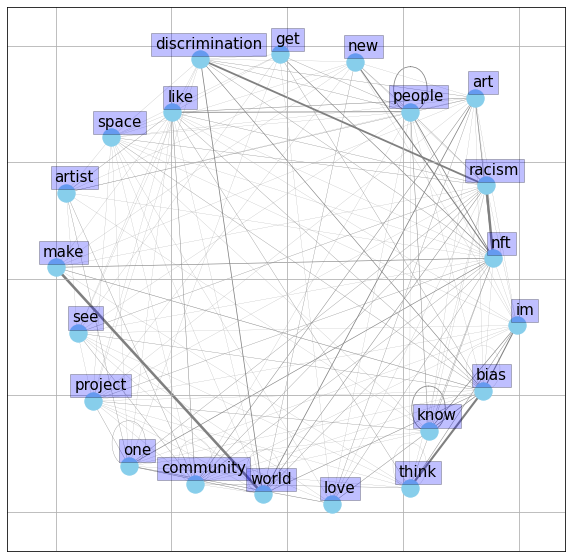

Diverse group now has 10463 nodes
G_sub has 22 nodes


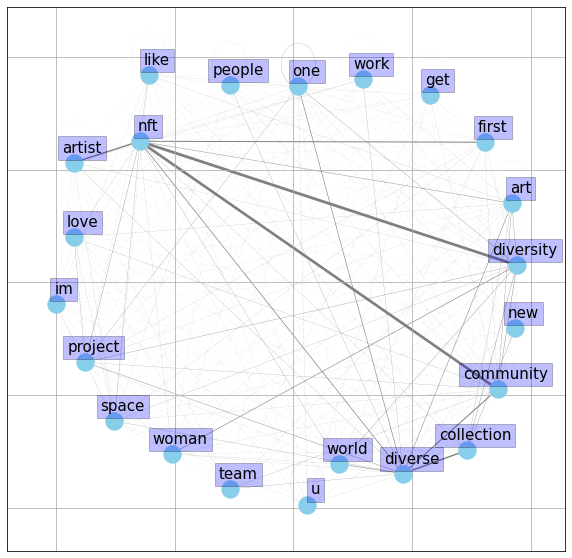

Ethic group now has 10520 nodes
G_sub has 32 nodes


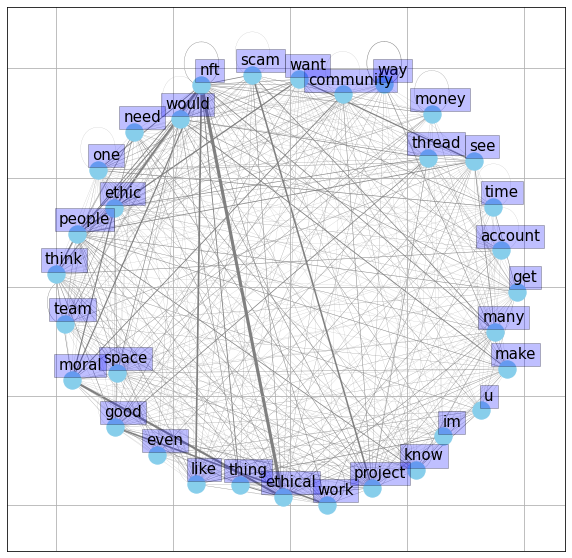

Fairiness group now has 7397 nodes
G_sub has 29 nodes


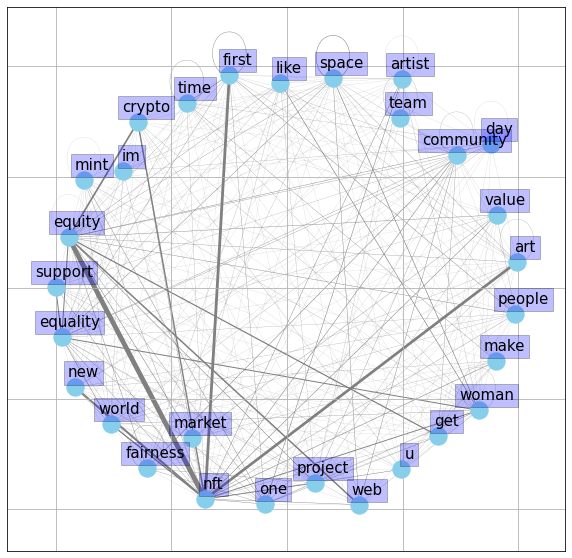

Trust group now has 21323 nodes
G_sub has 27 nodes


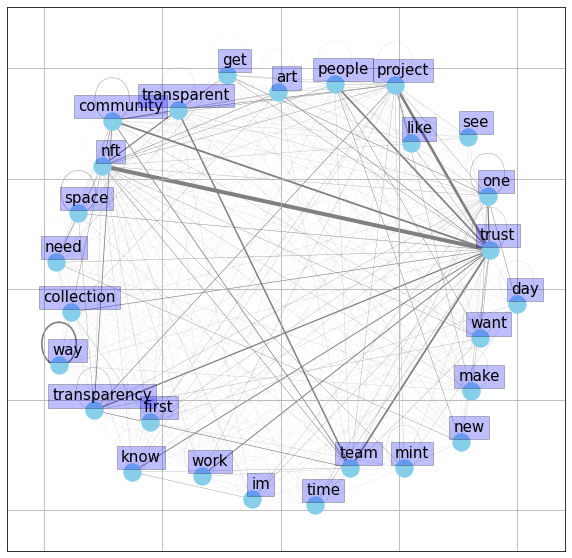

In [253]:
generate_nx_graph(df_bigram_bias,'Bias group',15,100,('get','im','see','u'))
generate_nx_graph(df_bigram_diverse,'Diverse group',2,300,('im','u'))
generate_nx_graph(df_bigram_ethic,'Ethic group',12,300,('im','u'))
generate_nx_graph(df_bigram_fair,'Fairiness group',10,150,('im','u'))
generate_nx_graph(df_bigram_trust,'Trust group',1.5,700,('u'))

# Sentiment Analysis

**Vader**, method developed specifically for Twitter and social media analysis(Hutto CJ, Gilbert E (2014) Vader: a parsimonious rule-based model for sentiment analysis of social media text. In: Eighth international AAAI conference on weblogs and social media. AAAI Press, Menlo Park).   
In real social platforms or daily conversations, some comments or words can be negative or positive based on the context. VADER works well given enough sentences. However, if the input is quite short, VADER sometimes can't tell the real sentiment behind short sentences.

In [3]:
vader = pd.read_csv('./vader_lexicon.txt',sep='\t',
            header=None,names=['TOKEN', 'MEAN-SENTIMENT-RATING', 'STANDARD DEVIATION', 'RAW-HUMAN-SENTIMENT-RATINGS'])

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
def tweet_sent_analysis(df):
    vader_score = {}
    avg_vs = 0
    for tweet in df['Tweets']:  
        if tweet != '':
            # return a dict consists of neg,neu,pos,compound scores
            vs = analyzer.polarity_scores(tweet) 
            # extract the compound score we only need it
            avg_vs+=vs['compound']
            vader_score[tweet] = avg_vs/len(df['Tweets'])
    
    return vader_score,avg_vs

## SA for KOL and public

In [70]:
# kol
vader_score,avg_vs = tweet_sent_analysis(df_merged[df_merged['User'].isin(KOL)])
# normal user
vader_score2, avg_vs2 = tweet_sent_analysis(df_merged[~df_merged['User'].isin(KOL)])

In [71]:
''' 
positive sentiment: compound score >= 0.05   
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)   
negative sentiment: compound score <= -0.05   
'''
# from KOL users
df_tweet_vader_score = pd.DataFrame(vader_score.items(),columns=['tweet','compound'])

pos_count = (df_tweet_vader_score['compound']>=0.05).sum()
neu_count = ((df_tweet_vader_score['compound']>-0.05) & (df_tweet_vader_score['compound']<0.05)).sum()
neg_count = (df_tweet_vader_score['compound']<=-0.05).sum()

dict_sentiment_type_count = {'positive':pos_count,'neutral':neu_count,'negative':neg_count}

# from normal users
df_tweet_vader_score2 = pd.DataFrame(vader_score2.items(),columns=['tweet','compound'])

pos_count2 = (df_tweet_vader_score2['compound']>=0.05).sum()
neu_count2 = ((df_tweet_vader_score2['compound']>-0.05) & (df_tweet_vader_score['compound']<0.05)).sum()
neg_count2 = (df_tweet_vader_score2['compound']<=-0.05).sum()

dict_sentiment_type_count2 = {'positive':pos_count2,'neutral':neu_count2,'negative':neg_count2}

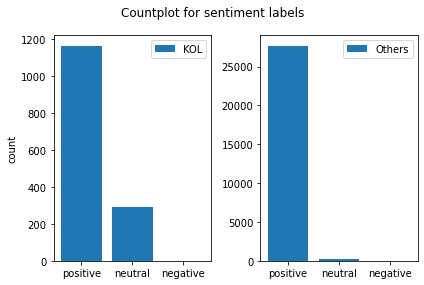

In [133]:
fig, ax = plt.subplots(1, 2, num=1, clear=True)

ax[0].bar(dict_sentiment_type_count.keys(),dict_sentiment_type_count.values(),label='KOL')
ax[0].legend()
ax[0].set_ylabel('count')
ax[1].bar(dict_sentiment_type_count2.keys(),dict_sentiment_type_count2.values(),label='Others')
ax[1].legend()

plt.suptitle('Countplot for sentiment labels')
plt.tight_layout()
plt.show('count')

In [42]:
def calculate_sentiment(tweet_lst):
    vader_score = {}
    avg_vs = 0
    for tweet in tweet_lst:  
        if tweet != '':
            # return a dict consists of neg,neu,pos,compound scores
            vs = analyzer.polarity_scores(tweet) 
            # extract the compound score we only need it
            avg_vs+=vs['compound']
            vader_score[tweet] = avg_vs/len(tweet_lst)
            
    df_tweet_vader_score = pd.DataFrame(vader_score.items(),columns=['tweet','compound'])

    pos_count = (df_tweet_vader_score['compound']>=0.05).sum()
    neu_count = ((df_tweet_vader_score['compound']>-0.05) & (df_tweet_vader_score['compound']<0.05)).sum()
    neg_count = (df_tweet_vader_score['compound']<=-0.05).sum()

    dict_sentiment_type_count = {'positive':pos_count,'neutral':neu_count,'negative':neg_count}
    
    return dict_sentiment_type_count

def plot_sentiment(tweet_lst,name):
    dict_sentiment_type_count = calculate_sentiment(tweet_lst)
    plt.bar(dict_sentiment_type_count.keys(),dict_sentiment_type_count.values())
    plt.title(f'Countplot for sentiment labels of {name}')
    plt.ylabel('count')
    plt.xlabel('sentiment')
    plt.show()

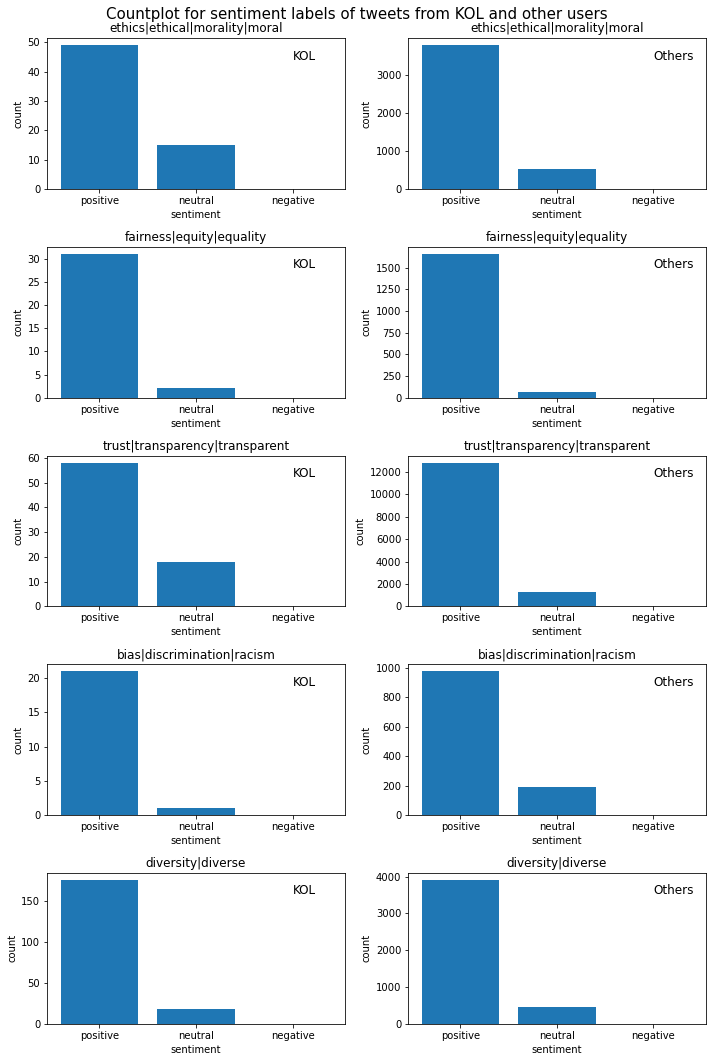

In [79]:
search = []
for i in ['ethic_group','fairness_group','trust_group','bias_group','diversity_group']:
    search.append('|'.join(eval(i)))

plt.figure(figsize=(10,15))
fig, axs = plt.subplots(5, 2, num=1, clear=True)

for i in range(10):
    row = int(i/2)
    plot_index = i+1
    # 第奇数个图为KOL（1，3，5，7，9）
    if i%2 != 0:
        plt.subplot(5,2,plot_index)
            # 匹配KOL的各关键词组推特，计算并plot出来情感评分
        stmt = calculate_sentiment(df_merged[(df_merged['User'].isin(KOL))&(df_merged['Tweets'].str.contains(search[row]))].Tweets)
        axs[row][0].bar(stmt.keys(),stmt.values(),label='KOL')
        axs[row][0].text(2, max(stmt.values())*0.9, 'KOL', fontsize = 12)
        axs[row][0].set_title(search[row])
    
    else:
        plt.subplot(5,2,plot_index)
        # 匹配Other users的各关键词组推特，计算并plot出来情感评分
        stmt = calculate_sentiment(df_merged[(~df_merged['User'].isin(KOL))&(df_merged['Tweets'].str.contains(search[row]))].Tweets)
        axs[row][1].bar(stmt.keys(),stmt.values(),label='Others')
        axs[row][1].text(2, max(stmt.values())*0.9, 'Others', fontsize = 12) 
        axs[row][1].set_title(search[row])

    # add annotation text
    for ax in axs.flat:
        ax.set(xlabel='sentiment', ylabel='count')

fig.suptitle('Countplot for sentiment labels of tweets from KOL and other users',fontsize=15)
fig.tight_layout()

## SA for randomized tweets from KOL and public users
This part should be run after having the randomizing results from Chapter 9

In [5]:
# read rondomized tweets files
kol_randTweets = pd.read_excel('./randomized/kol/kol_randomized_tweets.xlsx',engine='openpyxl') 
public_randTweets = pd.read_excel('./randomized/public/public_randomized_tweets.xlsx',engine='openpyxl')# 手动指定解析引擎

In [35]:
kol_randTweets.head()

Topic       Word                                             Tweets
0      0     bother  Just warning people for an upcoming rug called...
1      0  brilliant  Let’s discuss pay transparency in web3! Join o...
2      0  brilliant  1/ Sometimes there are brilliant individuals o...
3      0  brilliant  Calling all diverse marketers looking to pivot...
4      0  brilliant  Our brilliant co-founder @thisispaff will be s...

In [36]:
public_randTweets.head()

Topic      Word                                             Tweets
0    0.0      join  Don't underestimate an Uchiha ...\n\nWe are de...
1    0.0      join  Welcome to the world of Spritely #NFT, a diver...
2    0.0  giveaway  ⏰ Set your clocks for Fashion Friday with desi...
3    0.0  giveaway  Gamers get hyped! \nWhat a giveaway we have to...
4    0.0   opensea  Really impressed with the quality and diversit...

In [6]:
# randomized kol tweets
vader_score_rand,avg_vs_rand = tweet_sent_analysis(kol_randTweets)
# randomized normal user tweets
vader_score2_rand, avg_vs2_rand = tweet_sent_analysis(public_randTweets)

In [7]:
''' 
positive sentiment: compound score >= 0.05   
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)   
negative sentiment: compound score <= -0.05   
'''
# from KOL users
df_randTweet_vader_score = pd.DataFrame(vader_score_rand.items(),columns=['tweet','compound'])

pos_count = (df_randTweet_vader_score['compound']>=0.05).sum()
neu_count = ((df_randTweet_vader_score['compound']>-0.05) & (df_randTweet_vader_score['compound']<0.05)).sum()
neg_count = (df_randTweet_vader_score['compound']<=-0.05).sum()

dict_sentiment_type_count = {'positive':pos_count,'neutral':neu_count,'negative':neg_count}

# from normal users
df_randTweet_vader_score2 = pd.DataFrame(vader_score2_rand.items(),columns=['tweet','compound'])

pos_count2 = (df_randTweet_vader_score2['compound']>=0.05).sum()
neu_count2 = ((df_randTweet_vader_score2['compound']>-0.05) & (df_randTweet_vader_score['compound']<0.05)).sum()
neg_count2 = (df_randTweet_vader_score2['compound']<=-0.05).sum()

dict_sentiment_type_count2 = {'positive':pos_count2,'neutral':neu_count2,'negative':neg_count2}

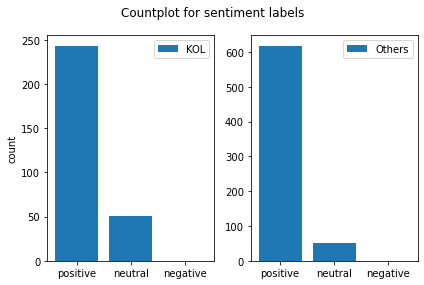

In [8]:
fig, ax = plt.subplots(1, 2, num=1, clear=True)

ax[0].bar(dict_sentiment_type_count.keys(),dict_sentiment_type_count.values(),label='KOL')
ax[0].legend()
ax[0].set_ylabel('count')
ax[1].bar(dict_sentiment_type_count2.keys(),dict_sentiment_type_count2.values(),label='Others')
ax[1].legend()

plt.suptitle('Countplot for sentiment labels')
plt.tight_layout()
plt.show('count')

In [10]:
dict_sentiment_type_count2.values()

dict_values([617, 51, 0])

In [16]:
print('kol positive/neutral ratio: {:.2%}'.format(51/243))

kol positive/neutral ratio: 20.99%


In [15]:
print('public positive/neutral ratio: {:.2%}'.format(51/617))

public positive/neutral ratio: 8.27%


# Topic Modeling
References: 
1. https://medium.datadriveninvestor.com/trump-tweets-topic-modeling-using-latent-dirichlet-allocation-e4f93b90b6fe
2. https://www.kaggle.com/code/errearanhas/topic-modelling-lda-on-elon-tweets/notebook
3. https://ourcodingclub.github.io/tutorials/topic-modelling-python/

In [6]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(
    analyzer='word',       
    min_df=5,# minimum required occurences of a word 
    stop_words='english',# remove stop words
    lowercase=True,# convert all words to lowercase
    token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
    max_features=5000,# max number of unique words
)

## [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

### LDA on all tweets

In [9]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(df_merged_clean.Tweets.apply(lambda x:x.split(' ')).values)
# Create Corpus
texts = df_merged_clean.Tweets.apply(lambda x:x.split(' ')).values
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# apply transformation
data_matrix = vectorizer.fit_transform(df_merged_clean.Tweets).toarray() # the frequency of each word/token in each tweet
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

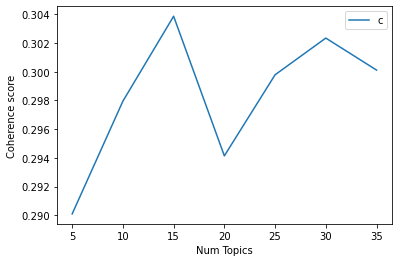

In [296]:
import gensim
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=50, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=55; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

With the coherence score seems to keep increasing with the number of topics, it may make better sense to pick the model that gave the highest CV before flattening out or a major drop. In this case, we picked K=15 and K=30 and then compare the best topic modelling.

In [10]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# apply transformation
data_matrix = vectorizer.fit_transform(df_merged_clean.Tweets).toarray() # the frequency of each word/token in each tweet

lda = LatentDirichletAllocation(n_components=15, random_state=0)
lda.fit(data_matrix) # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
dtm = np.matrix(data_matrix) # Casting the document vectors to a numpy.matrix
pyLDAvis.sklearn.prepare(lda, dtm, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
13     114.344879  114.308296       1        1  12.046084
10     105.821045  -93.749626       2        1   9.013148
7     -138.334473   95.320763       3        1   8.294510
6       -7.436697  111.259697       4        1   7.673120
4     -207.550629 -105.472603       5        1   7.094461
3       52.817650   14.603765       6        1   6.569861
0      168.010849    6.806950       7        1   6.252584
5      -94.169601 -157.789551       8        1   6.196043
9     -122.849174  -39.059418       9        1   5.982000
1      -94.894264  195.408295      10        1   5.759802
12      24.927401 -180.464874      11        1   5.491197
11     -53.413467   26.832108      12        1   5.476425
8      -12.255850  -72.093201      13        1   5.430956
14    -224.217957   28.070581      14        1   5.365138
2       36.154255  209.427582      15        1   3.354671, topic_info=           Term          Freq         Total Category  logprob  loglift
4590      trust  13263.000000  13263.000000  Default  30.0000  30.0000
4813     wallet   2063.000000   2063.000000  Default  29.0000  29.0000
2938       need   2641.000000   2641.000000  Default  28.0000  28.0000
1277  diversity   2582.000000   2582.000000  Default  27.0000  27.0000
844   community   4697.000000   4697.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
3064    opensea     93.357905    490.041467  Topic15  -5.0473   1.7368
249      artist    120.607945   1722.631855  Topic15  -4.7912   0.7358
707       check    104.158639   1181.253839  Topic15  -4.9378   0.9664
2602     listed     81.420714    322.176245  Topic15  -5.1841   2.0193
3417    project     93.872182   6573.226566  Topic15  -5.0418  -0.8540

[1114 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
26        1  0.929251  accordingly
27        3  0.000891      account
27        5  0.000891      account
27        9  0.434694      account
27       10  0.562074      account
...     ...       ...          ...
4988     13  0.019735        youve
4991      2  0.925099         zaga
4992      1  0.038805     zagabond
4992     11  0.892523     zagabond
4997     12  0.952876         zone

[3456 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 11, 8, 7, 5, 4, 1, 6, 10, 2, 13, 12, 9, 15, 3])

In [11]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# apply transformation
data_matrix = vectorizer.fit_transform(df_merged_clean.Tweets).toarray() # the frequency of each word/token in each tweet

lda = LatentDirichletAllocation(n_components=30, random_state=0)
lda.fit(data_matrix) # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
dtm = np.matrix(data_matrix) # Casting the document vectors to a numpy.matrix
pyLDAvis.sklearn.prepare(lda, dtm, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
13     119.070190   64.655502       1        1  5.588029
6       54.382130  109.799164       2        1  5.109635
1     -161.423965 -103.744957       3        1  4.920606
18    -135.370758   36.673065       4        1  4.915647
21     177.317215  -66.872452       5        1  4.813753
7      -16.436356  142.453796       6        1  4.550547
29      31.052383  204.777573       7        1  4.453578
15     -25.024384 -186.083466       8        1  4.131052
3      -68.157486   20.934038       9        1  3.908848
19      -3.751695    4.961509      10        1  3.765057
4     -114.470009 -179.605469      11        1  3.718994
5     -110.729126  -40.476776      12        1  3.522658
10      42.552418  -42.789406      13        1  3.518984
12     -10.661536   71.922211      14        1  3.290854
26     112.652969  -16.279951      15        1  3.035681
25    -195.499146  -25.853945      16        1  2.907598
14    -207.165924   66.070419      17        1  2.805456
22      10.217649 -110.752060      18        1  2.773148
28     -81.255081   96.477776      19        1  2.711528
0      -77.253441  192.755219      20        1  2.698506
11     182.353027  110.412880      21        1  2.693213
24      89.766510  -93.997673      22        1  2.636464
16     -36.483528  -52.542774      23        1  2.619760
20     -72.052170 -112.144821      24        1  2.439832
17     144.822769 -150.811508      25        1  2.381736
23    -148.475357  135.678162      26        1  2.356184
8      189.811615   17.382956      27        1  2.128129
2       56.555355   33.755768      28        1  1.971830
9       58.988537 -178.376541      29        1  1.860089
27     110.556717  164.236694      30        1  1.772605, topic_info=           Term          Freq         Total Category  logprob  loglift
4590      trust  13150.000000  13150.000000  Default  30.0000  30.0000
1277  diversity   2530.000000   2530.000000  Default  29.0000  29.0000
4405       team   2854.000000   2854.000000  Default  28.0000  28.0000
4813     wallet   2025.000000   2025.000000  Default  27.0000  27.0000
245         art   2390.000000   2390.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
2962        nft     90.348252  15070.993148  Topic30  -4.4422  -1.0841
1331       drop     50.159840    915.158619  Topic30  -5.0306   1.1288
1822        fud     39.387481    143.215596  Topic30  -5.2724   2.7418
1206       devs     39.746983    315.052106  Topic30  -5.2633   1.9625
4813     wallet     39.812070   2025.051260  Topic30  -5.2617   0.1035

[2021 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
6        10  0.864656       abuse
6        27  0.096073       abuse
8        19  0.892803     abusing
11       29  0.887740         acc
12        7  0.843815  accelerate
...     ...       ...         ...
4984     23  0.089567       young
4984     27  0.012795       young
4995     25  0.902229         zil
4998      9  0.158781         zoo
4998     22  0.793907         zoo

[7867 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 7, 2, 19, 22, 8, 30, 16, 4, 20, 5, 6, 11, 13, 27, 26, 15, 23, 29, 1, 12, 25, 17, 21, 18, 24, 9, 3, 10, 28])

In [14]:
for i,topic in enumerate(lda.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['discord', 'time', 'trust', 'nft', 'free', 'profit', 'look', 'question', 'mint', 'transparent']


Top 10 words for topic #1:
['crypto', 'got', 'essay', 'nft', 'metamask', 'help', 'hacked', 'trust', 'need', 'wallet']


Top 10 words for topic #2:
['new', 'collectible', 'art', 'different', 'diverse', 'created', 'promote', 'digital', 'proud', 'diversity']


Top 10 words for topic #3:
['discord', 'real', 'devs', 'fully', 'community', 'doxxed', 'nft', 'project', 'transparent', 'team']


Top 10 words for topic #4:
['fair', 'winner', 'user', 'platform', 'fairness', 'giveaway', 'transparency', 'transparent', 'nft', 'token']


Top 10 words for topic #5:
['art', 'life', 'diverse', 'new', 'thanks', 'work', 'collector', 'nft', 'trust', 'artist']


Top 10 words for topic #6:
['web', 'community', 'project', 'inclusion', 'diverse', 'equality', 'woman', 'space', 'nft', 'diversity']


Top 10 words for topic #7:
['thing', 'retweet', 'tag', 'friend', 'follow', 'people', 'trust'

## Evaluate topic coherence score to tune the model
1. https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
2. https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/

In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

### calculate for KOL

In [16]:
# find KOL users
df_KOL_clean = df_merged_clean[df_merged_clean['User'].isin(KOL)]

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(df_KOL_clean.Tweets.apply(lambda x:x.split(' ')).values)
# Create Corpus（一堆分词列表组成的数组） 
texts = df_KOL_clean.Tweets.apply(lambda x:x.split(' ')).values
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

比较c-p值，选择最佳主题数

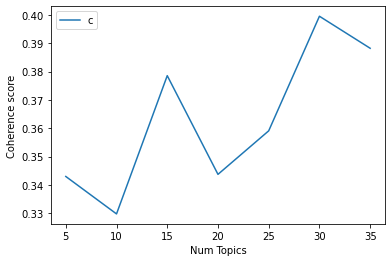

In [287]:
import gensim
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title('KOL group')
plt.xlabel("Num of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

With the coherence score seems to keep increasing with the number of topics, it may make better sense to pick the model that gave the highest CV before flattening out or a major drop. In this case, we picked K=30.

In [17]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# apply transformation
data_matrix_kol = vectorizer.fit_transform(df_KOL_clean.Tweets).toarray() # the frequency of each word/token in each tweet

lda_kol = LatentDirichletAllocation(n_components=30, random_state=0)
lda_kol.fit(data_matrix_kol) # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
dtm = np.matrix(data_matrix_kol) # Casting the document vectors to a numpy.matrix
pyLDAvis.sklearn.prepare(lda_kol, dtm, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
14     119.070190   64.655502       1        1  6.876858
21      54.382130  109.799164       2        1  6.070158
27    -161.423965 -103.744957       3        1  5.844895
12    -135.370758   36.673065       4        1  5.303078
29     177.317215  -66.872452       5        1  4.743307
25     -16.436356  142.453796       6        1  4.723837
17      31.052383  204.777573       7        1  4.005886
10     -25.024384 -186.083466       8        1  3.829043
6      -68.157486   20.934038       9        1  3.464389
9       -3.751695    4.961509      10        1  3.297314
24    -114.470009 -179.605469      11        1  3.240811
8     -110.729126  -40.476776      12        1  3.187306
2       42.552418  -42.789406      13        1  3.031744
18     -10.661536   71.922211      14        1  2.896088
3      112.652969  -16.279951      15        1  2.881517
1     -195.499146  -25.853945      16        1  2.879889
26    -207.165924   66.070419      17        1  2.878641
5       10.217649 -110.752060      18        1  2.845294
23     -81.255081   96.477776      19        1  2.796156
22     -77.253441  192.755219      20        1  2.742927
13     182.353027  110.412880      21        1  2.733270
15      89.766510  -93.997673      22        1  2.701485
16     -36.483528  -52.542774      23        1  2.613100
7      -72.052170 -112.144821      24        1  2.193641
4      144.822769 -150.811508      25        1  2.154991
28    -148.475357  135.678162      26        1  2.150117
11     189.811615   17.382956      27        1  2.042271
19      56.555355   33.755768      28        1  2.026414
20      58.988537 -178.376541      29        1  1.952034
0      110.556717  164.236694      30        1  1.893537, topic_info=           Term        Freq       Total Category  logprob  loglift
233     diverse  317.000000  317.000000  Default  30.0000  30.0000
509   metaverse  141.000000  141.000000  Default  29.0000  29.0000
537         nft  304.000000  304.000000  Default  28.0000  28.0000
601     project  388.000000  388.000000  Default  27.0000  27.0000
163  collection  129.000000  129.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
768       thing    3.076429   38.211181  Topic30  -4.6511   1.4474
566      people    6.148309  265.894830  Topic30  -3.9587   0.1998
192     created    2.942301   65.824773  Topic30  -4.6957   0.8589
845         way    2.548334   62.707665  Topic30  -4.8395   0.7637
338      gender    2.203553   32.592027  Topic30  -4.9848   1.2727

[1382 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         8  0.150777   ability
0        25  0.452330   ability
0        26  0.150777   ability
1         4  0.153230      able
1         8  0.262680      able
...     ...       ...       ...
876      23  0.162781      yuga
877       4  0.174469  zagabond
877      12  0.174469  zagabond
877      18  0.348938  zagabond
877      19  0.174469  zagabond

[3828 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 22, 28, 13, 30, 26, 18, 11, 7, 10, 25, 9, 3, 19, 4, 2, 27, 6, 24, 23, 14, 16, 17, 8, 5, 29, 12, 20, 21, 1])

In [292]:
for i,topic in enumerate(lda_kol.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['make', 'mission', 'including', 'build', 'space', 'changemakers', 'web', 'create', 'leader', 'diverse']


Top 10 words for topic #1:
['adopt', 'bronto', 'diverse', 'inclusivity', 'rex', 'design', 'equity', 'disability', 'verified', 'diversity']


Top 10 words for topic #2:
['partner', 'investor', 'rug', 'involved', 'capital', 'coinbase', 'member', 'person', 'yuga', 'labs']


Top 10 words for topic #3:
['scam', 'club', 'provided', 'founder', 'verified', 'follower', 'project', 'nft', 'twitter', 'account']


Top 10 words for topic #4:
['experience', 'working', 'happen', 'crypto', 'changemaker', 'training', 'community', 'buy', 'time', 'year']


Top 10 words for topic #5:
['information', 'public', 'know', 'mint', 'ecosystem', 'nft', 'work', 'diversity', 'blockchain', 'space']


Top 10 words for topic #6:
['forward', 'need', 'gender', 'world', 'new', 'project', 'diverse', 'collection', 'nft', 'space']


Top 10 words for topic #7:
['net', 'evidence', 'free', 'wont'

### calculate for the other users

In [13]:
# find the other users
df_others_clean = df_merged_clean[~df_merged_clean['User'].isin(KOL)]

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(df_others_clean.Tweets.apply(lambda x:x.split(' ')).values)
# Create Corpus
texts = df_others_clean.Tweets.apply(lambda x:x.split(' ')).values
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

比较c-p值，选择最佳主题数

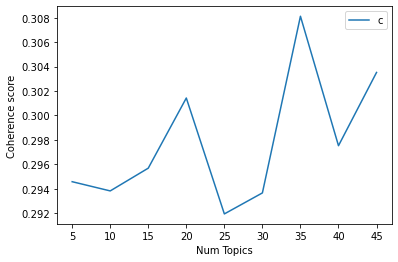

In [294]:
import gensim
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=5, limit=50, step=5)
# Show graph
import matplotlib.pyplot as plt
limit=55; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title('Public user group')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

With the coherence score seems to keep increasing with the number of topics, it may make better sense to pick the model that gave the highest CV before flattening out or a major drop. In this case, we picked K=35.

In [14]:
# apply transformation
data_matrix_other = vectorizer.fit_transform(df_others_clean.Tweets).toarray() # the frequency of each word/token in each tweet

lda_other = LatentDirichletAllocation(n_components=35, random_state=0)
lda_other.fit(data_matrix_other) # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
dtm = np.matrix(data_matrix_other) # Casting the document vectors to a numpy.matrix
pyLDAvis.sklearn.prepare(lda_other, dtm, vectorizer, mds='tsne')

NameError: name 'pyLDAvis' is not defined

In [103]:
for i,topic in enumerate(lda_other.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['join', 'giveaway', 'opensea', 'check', 'nft', 'family', 'art', 'new', 'thank', 'trust']


Top 10 words for topic #1:
['project', 'collector', 'new', 'work', 'best', 'moral', 'space', 'art', 'nft', 'artist']


Top 10 words for topic #2:
['sale', 'girl', 'price', 'unique', 'listed', 'available', 'nft', 'diverse', 'eth', 'collection']


Top 10 words for topic #3:
['dao', 'space', 'trust', 'diverse', 'people', 'better', 'looking', 'building', 'nft', 'community']


Top 10 words for topic #4:
['awareness', 'thats', 'visit', 'mental', 'health', 'selling', 'imagine', 'nft', 'ethical', 'world']


Top 10 words for topic #5:
['bullish', 'best', 'transparent', 'earn', 'trust', 'staking', 'gaming', 'play', 'nft', 'game']


Top 10 words for topic #6:
['account', 'actually', 'transparent', 'tweet', 'thread', 'nft', 'rug', 'look', 'like', 'project']


Top 10 words for topic #7:
['ive', 'read', 'know', 'market', 'fairness', 'random', 'vrf', 'transparent', 'trust', 'nft']




# Thematic analysis

In [18]:
df_kol = df_merged[df_merged.User.isin(KOL)]
df_public = df_merged[~df_merged.User.isin(KOL)]

## for kol

In [169]:
for i,topic in enumerate(lda_kol.components_):
    exec(f'topic{i} = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]')
    
topics = []
for i in range(30):
    topics.append(eval(f'topic{i}'))

In [170]:
# create a dataframe to store all search word in each topic and its randomized tweets
kol_randomized_tweets = pd.DataFrame(columns=['Topic','Word','Tweets'])
for i in range(len(topics)):
    # iterate each word in every topic
    c = pd.DataFrame(columns=['Topic','Word','Tweets'])
    for word in topics[i]:
        # randomize 5 tweets if existed for each word
        df = df_kol[df_kol.Tweets.str.contains(word)]
        a = pd.DataFrame(index=np.arange(min(5,len(df))))
        # a colum to store word
        a["Word"]=word
        exec("a['Topic'] = i")
        if len(df)>=5:
            b = df.sample(n=5).Tweets.reset_index(drop=True)
        else:
            b = df.sample(n=len(df)).Tweets.reset_index(drop=True)
        # a column to store tweets
        a['Tweets'] = b 
        # concat randomized tweets based on word
        c = pd.concat([c,a])
        c.to_csv(f'./randomized/kol/topic{i}.csv')
    kol_randomized_tweets = pd.concat([kol_randomized_tweets,c]).reset_index(drop=True)

kol_randomized_tweets.to_excel('./randomized/kol/kol_randomized_tweets.xlsx',encoding='utf-8-sig' ,index=False)

In [171]:
kol_randomized_tweets

Topic       Word                                             Tweets
0       0     bother  Just warning people for an upcoming rug called...
1       0  brilliant  Let’s discuss pay transparency in web3! Join o...
2       0  brilliant  1/ Sometimes there are brilliant individuals o...
3       0  brilliant  Calling all diverse marketers looking to pivot...
4       0  brilliant  Our brilliant co-founder @thisispaff will be s...
..    ...        ...                                                ...
399    29       code  If you have a large audience in this space, yo...
400    29       code  Remembering not to shame others when their ide...
401    29   avoiding  @littlelauchie Marketing doesn’t equate to ino...
402    29      chill  🔥NEW NFT drop!🔥 1/1 Space base cafe! 🪐\nlisted...
403    29      chill  @blawgchain @SuperRareLabs @SuperRare I'm a la...

[404 rows x 3 columns]

## for public

In [16]:
for i,topic in enumerate(lda_other.components_):
    exec(f'topic{i} = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]')
    
topics = []
for i in range(35):
    topics.append(eval(f'topic{i}'))

In [21]:
# create a dataframe to store all search word in each topic and its randomized tweets
public_randomized_tweets = pd.DataFrame(columns=['Topic','Word','Tweets'])
for i in range(len(topics)):
    # iterate each word in every topic
    c = pd.DataFrame(columns=['Topic','Word','Tweets'])
    for word in topics[i]:
        # randomize 2 tweets if existed for each word
        df = df_public[df_public.Tweets.str.contains(word)]
        a = pd.DataFrame(index=np.arange(min(2,len(df))))
        # a colum to store word
        a["Word"] = word
        exec("a['Topic'] = i")
        if len(df)>=2:
            b = df.sample(n=2).Tweets.reset_index(drop=True)
        else:
            b = df.sample(n=len(df)).Tweets.reset_index(drop=True)
        # a column to store tweets
        a['Tweets'] = b
        # concat randomized tweets based on word
        c = pd.concat([c,a])
        c.to_csv(f'./randomized/public/topic{i}.csv')
    public_randomized_tweets = pd.concat([public_randomized_tweets,c]).reset_index(drop=True)

public_randomized_tweets.to_csv('./randomized/public/public_randomized_tweets.xlsx',encoding='utf-8-sig',index=False)

In [22]:
public_randomized_tweets

Topic       Word                                             Tweets
0       0       join  Don't underestimate an Uchiha ...\n\nWe are de...
1       0       join  Welcome to the world of Spritely #NFT, a diver...
2       0   giveaway  ⏰ Set your clocks for Fashion Friday with desi...
3       0   giveaway  Gamers get hyped! \nWhat a giveaway we have to...
4       0    opensea  Really impressed with the quality and diversit...
..    ...        ...                                                ...
695    34        art  🎁 Botzy is in the process of creating a New* N...
696    34        nft  Happy Mother’s Day family!!!!❤️\n\n#NFTCommuni...
697    34        nft  🌸Friday Space Hangs🌸\n\nJoin me in conversatio...
698    34  diversity  🌟New Listed!!!\nWelcome @diverse join the #Min...
699    34  diversity  New PoWeR GAL added: CONFIDENT \n\nPoWeR GAL i...

[700 rows x 3 columns]